# Proyek Klasifikasi Gambar: [Input Nama Dataset]
- **Nama:** Ridho Alkhoiri
- **Email:** ridho.alkhoiri@gmail.com
- **ID Dicoding:** nigthless

## Import Semua Packages/Library yang Digunakan

In [ ]:
!pip install kaggle

In [ ]:
!pip install tensorflowjs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.1 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigquery 3.31.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.


In [ ]:
import os, shutil
import zipfile
import random
from random import sample
import shutil
from shutil import copyfile
import pathlib
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm as tq
import cv2
from PIL import Image
import skimage
from skimage import io
from skimage.transform import resize
from skimage.transform import rotate, AffineTransform, warp
from skimage import img_as_ubyte
from skimage.exposure import adjust_gamma
from skimage.util import random_noise
import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras import Model, layers,  regularizers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.layers import InputLayer, Conv2D, SeparableConv2D, MaxPooling2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, ReduceLROnPlateau
import tensorflow as tf
import tensorflowjs as tfjs
from google.colab import files
import io

## Data Preparation

### Data Loading

In [ ]:
# Upload file kaggle.json yang kamu unduh dari akun Kaggle
from google.colab import files
files.upload()  # upload kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ridhoalkhoiri","key":"a9233942830cbb3d001689191c55c568"}'}

In [ ]:
# Buat direktori jika belum ada

os.makedirs("/root/.kaggle", exist_ok=True)

# Pindahkan file ke direktori .kaggle

shutil.move("kaggle.json", "/root/.kaggle/kaggle.json")

# Atur permission agar tidak terlalu terbuka

os.chmod("/root/.kaggle/kaggle.json", 600)

In [ ]:
# Download kaggle dataset and unzip the file
# !cp kaggle.json ~/.kaggle/

# !chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download antobenedetti/animals
!unzip animals.zip

Streaming output truncated to the last 5000 lines.
  inflating: animals/train/horse/horse2690.jpg  
  inflating: animals/train/horse/horse2691.jpg  
  inflating: animals/train/horse/horse2692.jpg  
  inflating: animals/train/horse/horse2693.jpg  
  inflating: animals/train/horse/horse2694.jpg  
  inflating: animals/train/horse/horse2695.jpg  
  inflating: animals/train/horse/horse2696.jpg  
  inflating: animals/train/horse/horse2697.jpg  
  inflating: animals/train/horse/horse2698.jpg  
  inflating: animals/train/horse/horse2699.jpg  
  inflating: animals/train/horse/horse27.jpg  
  inflating: animals/train/horse/horse270.jpg  
  inflating: animals/train/horse/horse2701.jpg  
  inflating: animals/train/horse/horse2702.jpg  
  inflating: animals/train/horse/horse2703.jpg  
  inflating: animals/train/horse/horse2704.jpg  
  inflating: animals/train/horse/horse2705.jpg  
  inflating: animals/train/horse/horse2706.jpg  
  inflating: animals/train/horse/horse2707.jpg  
  inflating: animals/

### Data Preprocessing

In [ ]:
# Direktori awal untuk train dan test
train_dir = "animals/train"
test_dir = "animals/val"

# Direktori baru untuk dataset gabungan
combined_dir = "animals/dataset"

In [ ]:
# Buat direktori baru untuk dataset gabungan
os.makedirs(combined_dir, exist_ok=True)

In [ ]:
# Salin file dan folder dari train
for category in os.listdir(train_dir):
    category_dir = os.path.join(train_dir, category)
    if os.path.isdir(category_dir):
        shutil.copytree(category_dir, os.path.join(combined_dir, category), dirs_exist_ok=True)

# Salin file dan folder dari test
for category in os.listdir(test_dir):
    category_dir = os.path.join(test_dir, category)
    if os.path.isdir(category_dir):
        shutil.copytree(category_dir, os.path.join(combined_dir, category), dirs_exist_ok=True)

## cheking


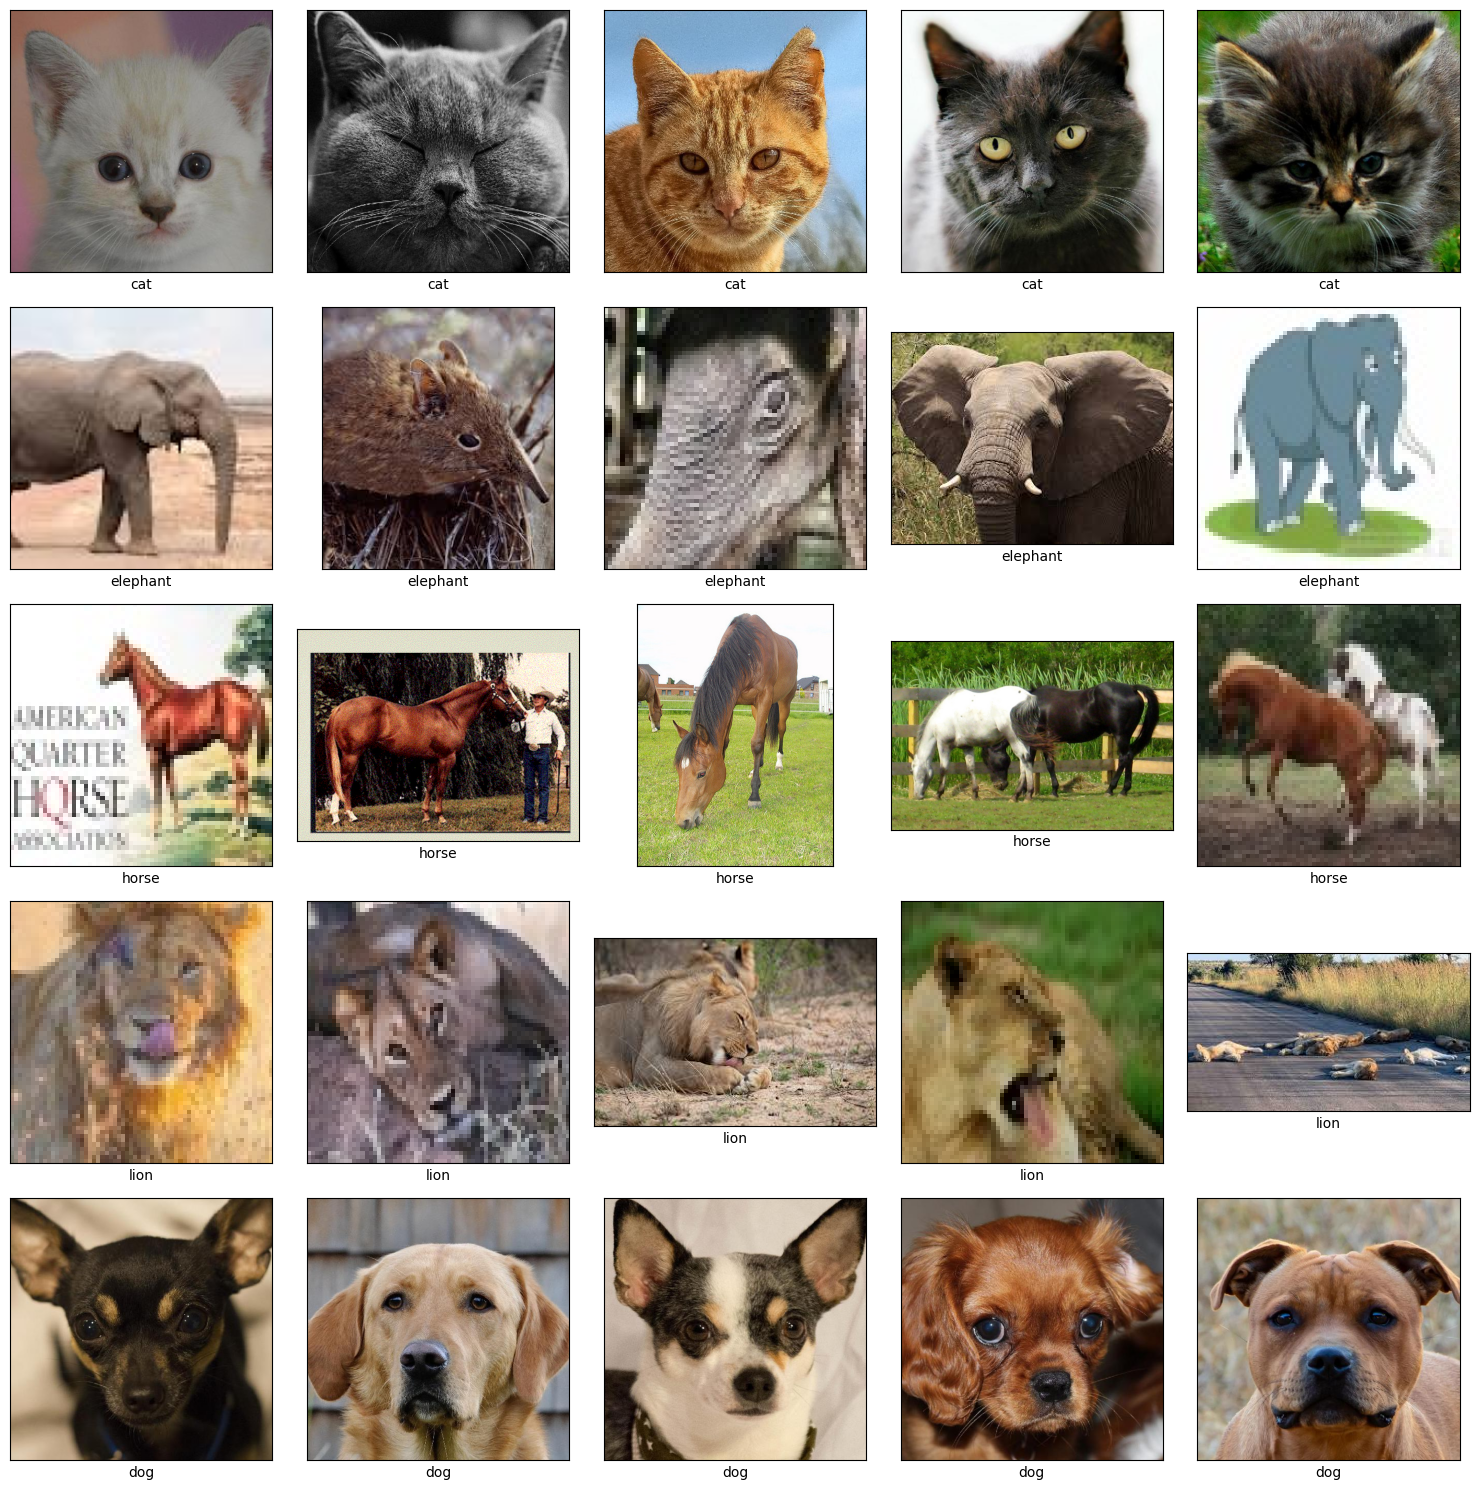

In [ ]:
# Membuat kamus yang menyimpan gambar untuk setiap kelas dalam data
lung_image = {}

# Tentukan path sumber train
path = "animals/"
path_sub = os.path.join(path, "dataset")
for i in os.listdir(path_sub):
    lung_image[i] = os.listdir(os.path.join(path_sub, i))

# Menampilkan secara acak 5 gambar di bawah setiap dari 2 kelas dari data.
# Anda akan melihat gambar yang berbeda setiap kali kode ini dijalankan.
path_sub = "animals/dataset/"

# Menampilkan secara acak 5 gambar di bawah setiap kelas dari data latih
fig, axs = plt.subplots(len(lung_image.keys()), 5, figsize=(15, 15))

for i, class_name in enumerate(os.listdir(path_sub)):
    images = np.random.choice(lung_image[class_name], 5, replace=False)

    for j, image_name in enumerate(images):
        img_path = os.path.join(path_sub, class_name, image_name)
        img = Image.open(img_path)  # Konversi menjadi skala keabuan
        axs[i, j].imshow(img, cmap='gray')
        axs[i, j].set(xlabel=class_name, xticks=[], yticks=[])


fig.tight_layout()

## plot

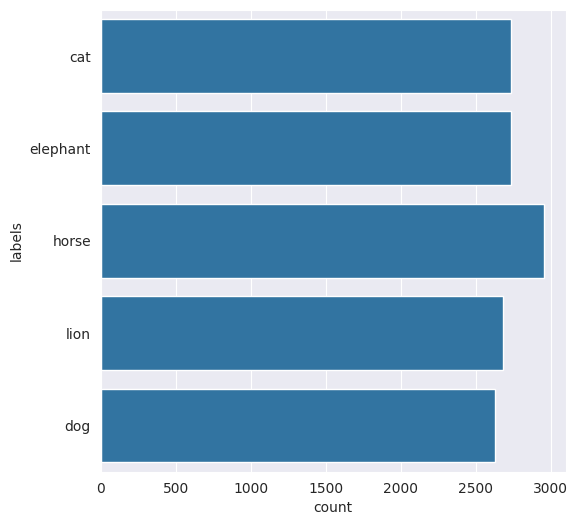

In [ ]:
# Definisikan path sumber
lung_path = "animals/dataset/"

# Buat daftar yang menyimpan data untuk setiap nama file, path file, dan label dalam data
file_name = []
labels = []
full_path = []

# Dapatkan nama file gambar, path file, dan label satu per satu dengan looping, dan simpan sebagai dataframe
for path, subdirs, files in os.walk(lung_path):
    for name in files:
        full_path.append(os.path.join(path, name))
        labels.append(path.split('/')[-1])
        file_name.append(name)

distribution_train = pd.DataFrame({"path":full_path, 'file_name':file_name, "labels":labels})

# Plot distribusi gambar di setiap kelas
Label = distribution_train['labels']
plt.figure(figsize = (6,6))
sns.set_style("darkgrid")
plot_data = sns.countplot(Label)

#### Split Dataset

In [ ]:
# Panggil variabel mypath yang menampung folder dataset gambar
mypath= 'animals/dataset/'

file_name = []
labels = []
full_path = []
for path, subdirs, files in os.walk(mypath):
    for name in files:
        full_path.append(os.path.join(path, name))
        labels.append(path.split('/')[-1])
        file_name.append(name)

# Memasukkan variabel yang sudah dikumpulkan pada looping di atas menjadi sebuah dataframe agar rapi
df = pd.DataFrame({"path":full_path,'file_name':file_name,"labels":labels})
# Melihat jumlah data gambar pada masing-masing label
df.groupby(['labels']).size()

,0
labels,
cat,2737
dog,2627
elephant,2732
horse,2951
lion,2678


In [ ]:
# X = data latih (train set)
# Y = data uji (test set)
# Z = data validasi (validation set)

# Variabel yang digunakan pada pemisahan data ini di mana variabel X = data path dan y = data labels
X = df['path']
y = df['labels']

# Split dataset awal menjadi data train+val (X+Z) dan test (Y)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.1, random_state=300
)

# Split data train+val (X+Z) menjadi X (train) dan Z (val)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=1/9, random_state=300
)


In [ ]:
# Menyatukan ke dalam masing-masing dataframe
df_X = pd.DataFrame({'path': X_train, 'labels': y_train, 'set': 'train'})
df_Z = pd.DataFrame({'path': X_val, 'labels': y_val, 'set': 'val'})
df_Y = pd.DataFrame({'path': X_test, 'labels': y_test, 'set': 'test'})

# Gabungkan semua menjadi satu dataframe
df_all = pd.concat([df_X, df_Z, df_Y], ignore_index=True)

In [ ]:
# Gabungkan DataFrame df_X, df_Z, df_Y
df_all = pd.concat([df_X, df_Z, df_Y], ignore_index=True)

print('===================================================== \n')
print(df_all.groupby(['set', 'labels']).size(), '\n')
print('===================================================== \n')

# Cek sampel data
print(df_all.sample(5))

# Memanggil dataset asli yang berisi keseluruhan data gambar yang sesuai dengan labelnya
datasource_path = "/content/drive/MyDrive/dataset/dataset_animal"
# Membuat variabel Dataset, tempat menampung data yang telah dilakukan pembagian data training dan testing
dataset_path = "Dataset-Final/"


set    labels  
test   cat          252
       dog          257
       elephant     265
       horse        321
       lion         278
train  cat         2236
       dog         2084
       elephant    2182
       horse       2355
       lion        2122
val    cat          249
       dog          286
       elephant     285
       horse        275
       lion         278
dtype: int64 


                                            path    labels    set
9951              animals/dataset/dog/dog300.jpg       dog  train
9248             animals/dataset/cat/cat1509.jpg       cat  train
351          animals/dataset/horse/horse1393.jpg     horse  train
5646   animals/dataset/elephant/elephant2200.jpg  elephant  train
12085           animals/dataset/lion/lion870.jpg      lion    val


In [ ]:
folder_path = ""

shutil.rmtree(folder_path)

In [ ]:
for index, row in tq(df_all.iterrows()):
    # Deteksi filepath
    file_path = row['path']
    if os.path.exists(file_path) == False:
            file_path = os.path.join(datasource_path,row['labels'],row['image'].split('.')[0])

    # Buat direktori tujuan folder
    if os.path.exists(os.path.join(dataset_path,row['set'],row['labels'])) == False:
        os.makedirs(os.path.join(dataset_path,row['set'],row['labels']))

    # Tentukan tujuan file
    destination_file_name = file_path.split('/')[-1]
    file_dest = os.path.join(dataset_path,row['set'],row['labels'],destination_file_name)

    # Salin file dari sumber ke tujuan
    if os.path.exists(file_dest) == False:
        shutil.copy2(file_path,file_dest)

0it [00:00, ?it/s]

In [ ]:
# Path utama ke masing-masing direktori
TRAIN_DIR = "Dataset-Final/train"
VAL_DIR = "Dataset-Final/val"
TEST_DIR = "Dataset-Final/test"

# Path ke tiap kelas di setiap set
train_cat = os.path.join(TRAIN_DIR, "cat")
train_dog = os.path.join(TRAIN_DIR, "dog")
train_elephant = os.path.join(TRAIN_DIR, "elephant")
train_horse = os.path.join(TRAIN_DIR, "horse")
train_lion = os.path.join(TRAIN_DIR, "lion")


val_cat = os.path.join(VAL_DIR, "cat")
val_dog = os.path.join(VAL_DIR, "dog")
val_elephant = os.path.join(VAL_DIR, "elephant")
val_horse = os.path.join(VAL_DIR, "horse")
val_lion = os.path.join(VAL_DIR, "lion")

test_cat = os.path.join(TEST_DIR, "cat")
test_dog = os.path.join(TEST_DIR, "dog")
test_horse = os.path.join(TEST_DIR, "horse")
test_elephant = os.path.join(TEST_DIR, "elephant")
test_lion = os.path.join(TEST_DIR, "lion")

# Menampilkan jumlah gambar
print("Total number of cat images in training set       :", len(os.listdir(train_cat)))
print("Total number of dog images in training set       :", len(os.listdir(train_dog)))
print("Total number of elephant images in training set  :", len(os.listdir(train_elephant)))
print("Total number of horse images in training set     :", len(os.listdir(train_horse)))
print("Total number of lion images in training set      :", len(os.listdir(train_lion)))
print("Total number of cat images in validation set     :", len(os.listdir(val_cat)))
print("Total number of dog images in validation set     :", len(os.listdir(val_dog)))
print("Total number of elephant images in validation set:", len(os.listdir(val_elephant)))
print("Total number of horse images in validation set   :", len(os.listdir(val_horse)))
print("Total number of lion images in validation set    :", len(os.listdir(val_lion)))
print("Total number of cat images in test set           :", len(os.listdir(test_cat)))
print("Total number of dog images in test set           :", len(os.listdir(test_dog)))
print("Total number of elephant images in test set      :", len(os.listdir(test_elephant)))
print("Total number of horse images in test set         :", len(os.listdir(test_horse)))
print("Total number of lion images in test set          :", len(os.listdir(test_lion)))


Total number of cat images in training set       : 2236
Total number of dog images in training set       : 2084
Total number of elephant images in training set  : 2182
Total number of horse images in training set     : 2355
Total number of lion images in training set      : 2122
Total number of cat images in validation set     : 249
Total number of dog images in validation set     : 286
Total number of elephant images in validation set: 285
Total number of horse images in validation set   : 275
Total number of lion images in validation set    : 278
Total number of cat images in test set           : 252
Total number of dog images in test set           : 257
Total number of elephant images in test set      : 265
Total number of horse images in test set         : 321
Total number of lion images in test set          : 278


## Modelling

In [ ]:
# Buat objek ImageDataGenerator yang menormalkan gambar dan split validation dari TRAIN_DIR
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1/255.0)

# Train generator
train_generator = datagen.flow_from_directory(
    TRAIN_DIR,
    batch_size=32,
    target_size=(150, 150),
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# Validation generator
validation_generator = datagen.flow_from_directory(
    TRAIN_DIR,
    batch_size=32,
    target_size=(150, 150),
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# Test generator
test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    batch_size=1,
    target_size=(150, 150),
    class_mode='categorical',
    shuffle=False
)


Found 8785 images belonging to 5 classes.
Found 2194 images belonging to 5 classes.
Found 1373 images belonging to 5 classes.


In [ ]:
# tf.keras.backend.clear_session()

####################### Init sequential model ##################################
model_1 = Sequential()

# ######################### Input layer with Fully Connected Layer ################################
# 1st Convolutional layer, Batch Normalization layer, and Pooling layer
model_1.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(150, 150, 3)))
model_1.add(BatchNormalization())
model_1.add(MaxPool2D((2, 2)))

# 2st Convolutional layer, Batch Normalization layer, and Pooling layer
model_1.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(150, 150, 3)))
model_1.add(BatchNormalization())
model_1.add(MaxPool2D((2, 2)))

# 3nd Convolutional layer, Batch Normalization layer, and Pooling layer
model_1.add(Conv2D(64, (3, 3),padding='same', activation='relu'))
model_1.add(BatchNormalization())
model_1.add(MaxPool2D((2, 2)))

# 4rd Convolutional layer, Batch Normalization layer, and Pooling layer
model_1.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model_1.add(BatchNormalization())
model_1.add(MaxPool2D((2, 2)))
model_1.add(Dropout(0.3))


GlobalAveragePooling2D(),
# Flatten layer
model_1.add(Flatten())
# 1nd Dense Layer
model_1.add(Dense(128, activation = 'relu', kernel_regularizer=regularizers.l2(0.01)))
# 1nd Dropout Layer
model_1.add(Dropout(0.5))
# 1nd Dense Layer
model_1.add(Dense(128, activation = 'relu', kernel_regularizer=regularizers.l2(0.01)))
# 1nd Dropout Layer
model_1.add(Dropout(0.5))


# Final Dense layer => For output prediction 1 mean (binary class in dataset), sigmoid for binary cases
model_1.add(Dense(5, activation='softmax'))
######################### Fully Connected Layer ################################

######################### Compile Model ################################
model_1.compile(optimizer=tf.optimizers.Adam(),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Summary of the Model Architecture
print(model_1.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 150, 150, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 75, 75, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 75, 75, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 37, 37, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 37, 37, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 18, 18, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10368)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,327,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,447,909 (5.52 MB)

 Trainable params: 1,447,397 (5.52 MB)

 Non-trainable params: 512 (2.00 KB)

None


In [ ]:
# Custom Callback: Stop training jika akurasi dan val_akurasinya sudah bagus
class myCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') > 0.95 and logs.get('val_accuracy') > 0.95:
            print("\nTraining dihentikan otomatis karena akurasi dan val_akurasi sudah bagus.")
            self.model.stop_training = True

# EarlyStopping: berhenti jika val_accuracy stagnan
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=7,
    restore_best_weights=True
)

# ReduceLROnPlateau: turunkan learning rate jika val_loss stagnan
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,                # Kurangi LR jadi setengahnya
    patience=5,                # Tunggu 5 epoch dulu sebelum diturunkan
    verbose=1
)

# Gabungkan semua callback
callbacks = [myCallback(), early_stopping, reduce_lr]

In [ ]:
print(train_generator.class_indices)


{'cat': 0, 'dog': 1, 'elephant': 2, 'horse': 3, 'lion': 4}


In [ ]:
# Hitung jumlah gambar di setiap kelas
count_cat = len(os.listdir(train_cat))
count_dog = len(os.listdir(train_dog))
count_elephant = len(os.listdir(train_elephant))
count_horse = len(os.listdir(train_horse))
count_lion = len(os.listdir(train_lion))

# Total gambar dalam train set
total_count = count_cat + count_dog + count_horse + count_elephant + count_lion

# Hitung bobot untuk setiap kelas (agar training tidak bias ke kelas mayoritas)
weight_cat = (1 / count_cat) * (total_count / 3.0)
weight_dog = (1 / count_dog) * (total_count / 3.0)
weight_elephant = (1 / count_elephant) * (total_count / 3.0)
weight_horse = (1 / count_horse) * (total_count / 3.0)
weight_lion = (1 / count_lion) * (total_count / 3.0)

# Definisikan class weights untuk 3 kelas (urutan label dari train_generator.class_indices)
class_weights = {0: weight_cat, 1: weight_dog, 2: weight_elephant, 3: weight_horse, 4: weight_lion}

# Training model
history_1 = model_1.fit(
    train_generator,
    epochs=100,
    batch_size=32,
    validation_data=validation_generator,
    class_weight=class_weights,
    callbacks=[myCallback(), early_stopping, reduce_lr]  # Kalau kamu pakai reduce_lr juga
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
275/275 ━━━━━━━━━━━━━━━━━━━━ 99s 325ms/step - accuracy: 0.2214 - loss: 7.3537 - val_accuracy: 0.2580 - val_loss: 4.0164 - learning_rate: 0.0010
Epoch 2/100
275/275 ━━━━━━━━━━━━━━━━━━━━ 79s 288ms/step - accuracy: 0.2163 - loss: 4.4554 - val_accuracy: 0.2060 - val_loss: 2.6042 - learning_rate: 0.0010
Epoch 3/100
275/275 ━━━━━━━━━━━━━━━━━━━━ 82s 297ms/step - accuracy: 0.3013 - loss: 3.4572 - val_accuracy: 0.3678 - val_loss: 2.1699 - learning_rate: 0.0010
Epoch 4/100
275/275 ━━━━━━━━━━━━━━━━━━━━ 79s 287ms/step - accuracy: 0.4124 - loss: 3.1033 - val_accuracy: 0.6085 - val_loss: 1.8787 - learning_rate: 0.0010
Epoch 5/100
275/275 ━━━━━━━━━━━━━━━━━━━━ 79s 288ms/step - accuracy: 0.5452 - loss: 2.6026 - val_accuracy: 0.6554 - val_loss: 1.6357 - learning_rate: 0.0010
Epoch 6/100
275/275 ━━━━━━━━━━━━━━━━━━━━ 82s 297ms/step - accuracy: 0.6428 - loss: 2.2168 - val_accuracy: 0.6249 - val_loss: 1.9422 - learning_rate: 0.0010
Epoch 7/100
275/275 ━━━━━━━━━━━━━━━━━━━━ 82s 298ms/step - accura

## Evaluasi dan Visualisasi

In [ ]:

# Akurasi training dari epoch terakhir
train_acc = history_1.history['accuracy'][-1]
print(f"Akurasi Training: {train_acc:.2%}")

Akurasi Training: 95.78%


In [ ]:
# Evaluasi model pada data test
test_loss, test_accuracy = model_1.evaluate(test_generator)
print(f"Akurasi Testing: {test_accuracy:.2%}")

1373/1373 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9724 - loss: 0.2359
Akurasi Testing: 92.43%


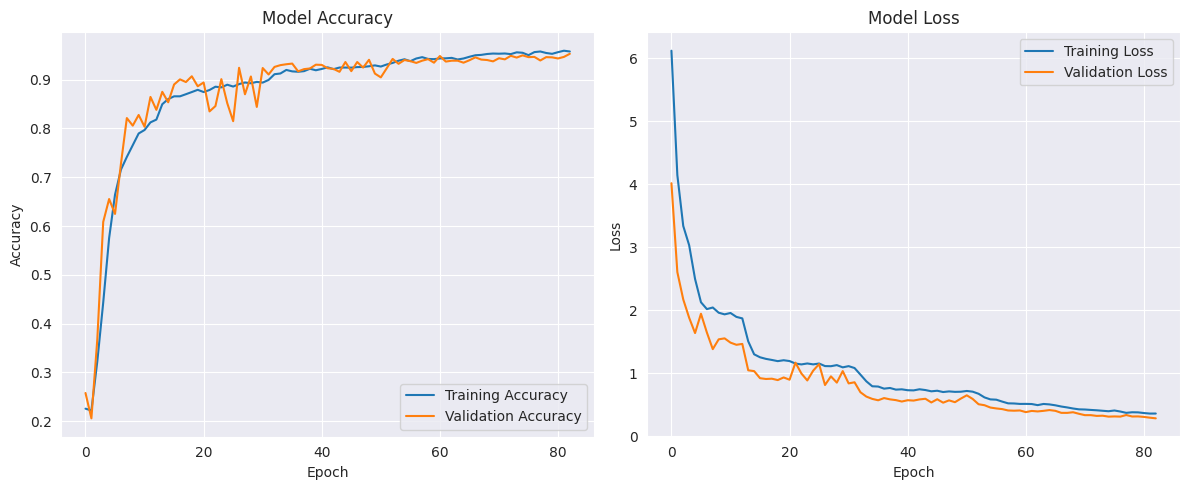

In [ ]:
# Plot Akurasi
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_1.history['accuracy'], label='Training Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history_1.history['loss'], label='Training Loss')
plt.plot(history_1.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

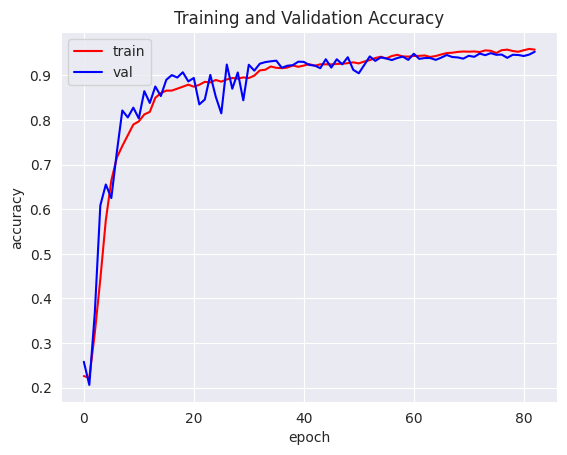

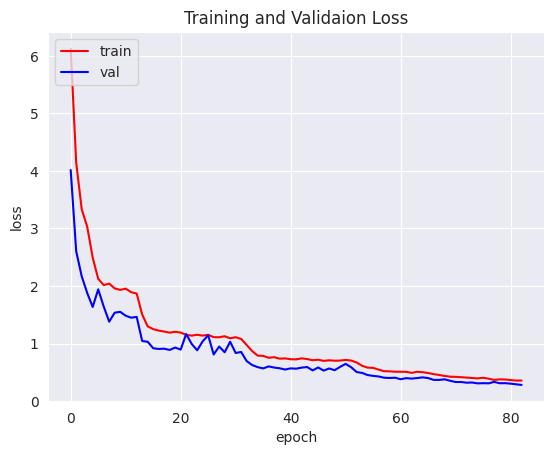

In [ ]:
acc = history_1.history['accuracy']
val_acc = history_1.history['val_accuracy']
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validaion Loss')
plt.show()

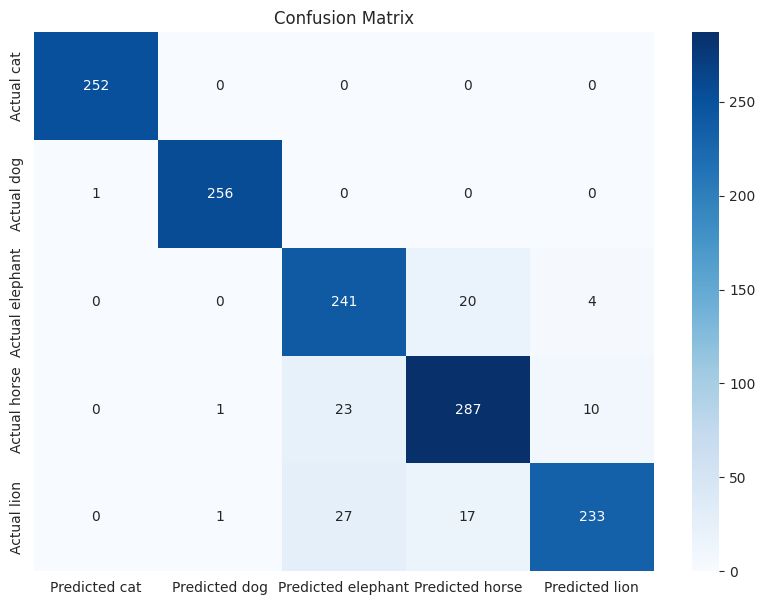


Classification Report:

              precision    recall  f1-score   support

         cat     0.9960    1.0000    0.9980       252
         dog     0.9922    0.9961    0.9942       257
    elephant     0.8282    0.9094    0.8669       265
       horse     0.8858    0.8941    0.8899       321
        lion     0.9433    0.8381    0.8876       278

    accuracy                         0.9243      1373
   macro avg     0.9291    0.9276    0.9273      1373
weighted avg     0.9265    0.9243    0.9244      1373



In [ ]:
# Reset generator
test_generator.reset()

# Prediksi
preds_1 = model_1.predict(test_generator, verbose=0)
y_pred = np.argmax(preds_1, axis=1)
y_true = test_generator.classes

# Ambil label class
labels = list(test_generator.class_indices.keys())

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Buat DataFrame untuk Confusion Matrix
cm_df = pd.DataFrame(cm, index=[f"Actual {label}" for label in labels],
                         columns=[f"Predicted {label}" for label in labels])

# Visualisasikan Confusion Matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=labels, digits=4))

## Konversi Model

In [ ]:
model_1.export('saved_model')

Saved artifact at 'saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  134405812617296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134405812618064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134405812620368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134405812621712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134405812621520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134405812619792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134405812622288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134405812623056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134405812623440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134405812624784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134405812622672: Te

In [ ]:
# === Path konfigurasi ===
saved_model_dir = "saved_model"
tfjs_output_dir = "tfjs_model"
tflite_output_dir = "tflite"
tflite_model_path = os.path.join(tflite_output_dir, "model.tflite")
merged_bin_name = "group1-shard1of1.bin"

# === Pastikan folder output ada ===
os.makedirs(tfjs_output_dir, exist_ok=True)
os.makedirs(tflite_output_dir, exist_ok=True)

# === Konversi ke TensorFlow.js ===
print("Mengonversi ke TensorFlow.js...")
tfjs.converters.convert_tf_saved_model(saved_model_dir, tfjs_output_dir)
print("✅ Model berhasil dikonversi ke TensorFlow.js!")

# === Merge semua file .bin jadi satu ===
print("🔀 Menggabungkan semua shard .bin...")
bin_files = sorted([f for f in os.listdir(tfjs_output_dir) if f.endswith(".bin")])
merged_bin_path = os.path.join(tfjs_output_dir, merged_bin_name)

with open(merged_bin_path, "wb") as outfile:
    for bin_file in bin_files:
        bin_path = os.path.join(tfjs_output_dir, bin_file)
        with open(bin_path, "rb") as infile:
            print(f"  ➕ Merging: {bin_file}")
            outfile.write(infile.read())

# Hapus shard asli
for bin_file in bin_files:
    os.remove(os.path.join(tfjs_output_dir, bin_file))

print(f"✅ Semua shard digabung ke: {merged_bin_name}")

# === Edit model.json agar pakai 1 shard ===
model_json_path = os.path.join(tfjs_output_dir, "model.json")
import json
with open(model_json_path, "r") as f:
    model_json = json.load(f)

model_json["weightsManifest"][0]["paths"] = [merged_bin_name]

with open(model_json_path, "w") as f:
    json.dump(model_json, f)

print("✅ model.json diperbarui untuk menggunakan 1 file shard!")

# === Konversi ke TFLite ===
print("Mengonversi ke TensorFlow Lite...")
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()

# Simpan model TFLite
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

print("✅ Model berhasil dikonversi ke TensorFlow Lite!")


Mengonversi ke TensorFlow.js...
✅ Model berhasil dikonversi ke TensorFlow.js!
🔀 Menggabungkan semua shard .bin...
  ➕ Merging: group1-shard1of2.bin
  ➕ Merging: group1-shard2of2.bin
✅ Semua shard digabung ke: group1-shard1of1.bin
✅ model.json diperbarui untuk menggunakan 1 file shard!
Mengonversi ke TensorFlow Lite...
✅ Model berhasil dikonversi ke TensorFlow Lite!


In [ ]:
!zip -r all_models.zip saved_model tfjs_model tflite
files.download('all_models.zip')


  adding: saved_model/ (stored 0%)
  adding: saved_model/fingerprint.pb (stored 0%)
  adding: saved_model/assets/ (stored 0%)
  adding: saved_model/saved_model.pb (deflated 88%)
  adding: saved_model/variables/ (stored 0%)
  adding: saved_model/variables/variables.index (deflated 71%)
  adding: saved_model/variables/variables.data-00000-of-00001 (deflated 9%)
  adding: tfjs_model/ (stored 0%)
  adding: tfjs_model/model.json (deflated 92%)
  adding: tfjs_model/group1-shard1of1.bin (deflated 9%)
  adding: tflite/ (stored 0%)
  adding: tflite/model.tflite (deflated 11%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Inference (Optional)

Saving download (1).jpeg to download (1) (5).jpeg


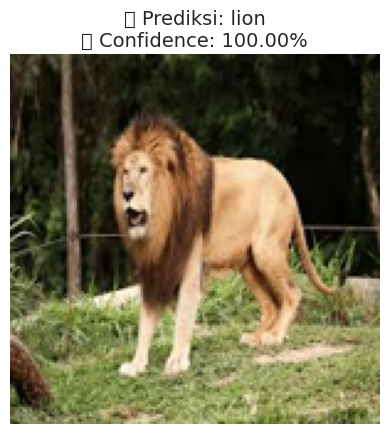

In [ ]:
from google.colab import files
import io
from PIL import Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Upload gambar
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Load model TFLite
tflite_model_path = "tflite/model.tflite"
interpreter = tf.lite.Interpreter(model_path=tflite_model_path)
interpreter.allocate_tensors()

# Ambil detail input/output
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
input_shape = input_details[0]['shape']  # [1, height, width, channels]
input_dtype = input_details[0]['dtype']
img_height, img_width = input_shape[1], input_shape[2]

# Preprocess gambar
img = Image.open(io.BytesIO(uploaded[filename])).convert("RGB").resize((img_width, img_height))
img_array = np.array(img)

# Normalisasi input
if input_dtype == np.uint8:
    input_data = np.expand_dims(img_array.astype(np.uint8), axis=0)
else:
    input_data = np.expand_dims(img_array.astype(np.float32) / 255.0, axis=0)

# Inference
interpreter.set_tensor(input_details[0]['index'], input_data)
interpreter.invoke()

# Output & Prediksi
output_data = interpreter.get_tensor(output_details[0]['index'])[0]
predicted_class = int(np.argmax(output_data))
confidence = float(output_data[predicted_class])

# Labels mapping
labels = {
    0: "cat",
    1: "dog",
    2: "elephant",
    3: "horse",
    4: "lion"
}

# Visualisasi hasil
plt.imshow(img)
plt.axis('off')
plt.title(f"✅ Prediksi: {labels[predicted_class]}\n📊 Confidence: {confidence:.2%}", fontsize=14)
plt.show()


In [ ]:
!pip freeze > requirements.txt
